<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/tohoku_kanto_temp_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tohoku-kanto-aug.csv to tohoku-kanto-aug.csv


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('tohoku-kanto-aug.csv', encoding='SHIFT-JIS', header=2)
# 前と同じ処理をして，抜き出しておく
for a_column in ['青森', '秋田', '盛岡', '山形', '仙台', '福島', '水戸', '宇都宮', 'さいたま', '前橋', '甲府', '千葉', '東京', '横浜']:
  for i in range(1, 11, 3):
    for j in range(0, 2, 1):
      df = df.drop(a_column + '.' + str(i + j), axis=1)

df = df.drop(1)

# DataFrameの中に欠損値がある場合は，0.0を代わりに入れておく
df = df.fillna(0)
df.head()

,Unnamed: 0,青森,青森.3,青森.6,青森.9,秋田,秋田.3,秋田.6,秋田.9,盛岡,盛岡.3,盛岡.6,盛岡.9,山形,山形.3,山形.6,山形.9,仙台,仙台.3,仙台.6,仙台.9,福島,福島.3,福島.6,福島.9,水戸,水戸.3,水戸.6,水戸.9,宇都宮,宇都宮.3,宇都宮.6,宇都宮.9,さいたま,さいたま.3,さいたま.6,さいたま.9,前橋,前橋.3,前橋.6,前橋.9,甲府,甲府.3,甲府.6,甲府.9,千葉,千葉.3,千葉.6,千葉.9,東京,東京.3,東京.6,東京.9,横浜,横浜.3,横浜.6,横浜.9
0,年月,平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日)
2,1977/8,21.5,26.0,17.9,4,22.9,26.5,19.4,6,21.6,26.0,18.1,4,22.9,27.6,19.2,6,22.7,26.1,20.2,6,23.3,27.3,20.2,10,23.1,26.9,20.1,8,23.2,27.0,20.1,7,0,0,0,0,23.9,27.8,20.8,11,24.5,29.1,21.4,12,24.3,27.5,21.5,13,25.0,28.4,22.3,19,24.4,27.7,21.8,15
3,1978/8,24.0,29.2,19.6,11,25.3,29.4,21.6,20,24.3,29.8,19.6,13,25.8,31.8,20.8,19,25.6,29.8,22.0,19,26.6,32.2,22.0,23,26.6,32.3,22.0,25,26.6,32.2,22.2,25,27.6,33.0,23.0,29,27.7,33.7,22.8,29,27.1,33.7,22.3,30,27.9,31.6,24.8,30,28.9,33.0,25.6,31,27.8,32.1,24.8,31
4,1979/8,22.6,27.6,18.0,5,24.0,28.2,20.0,8,22.9,28.1,18.1,8,24.5,30.0,19.9,14,24.9,28.9,21.6,14,25.4,30.6,21.5,20,25.4,29.7,22.0,22,25.5,30.0,22.1,20,26.2,30.3,23.0,23,26.0,30.8,22.4,22,25.9,31.6,22.2,21,26.7,30.2,24.0,26,27.4,31.0,24.6,27,26.6,30.5,24.0,25
5,1980/8,19.6,23.5,16.2,0,22.3,26.5,18.7,1,19.8,24.3,16.0,0,21.3,26.0,17.6,0,20.1,22.9,17.9,0,21.0,24.6,18.2,0,21.3,25.1,18.5,2,22.1,26.2,19.2,1,22.8,26.3,20.0,5,22.6,26.3,19.9,5,24.2,28.9,21.1,6,22.6,26.1,20.0,4,23.4,26.6,20.7,8,23.0,26.3,20.6,5


In [3]:
# グラフ表示するためにローマ字ラベルを作っておく
all_city_list = (['Aomori', 'Akita', 'Morioka', 'Yamagata', 'Sendai', 'Fukushima', 'Mito', 'Utsunomiya', 'Saitama', 'Maebashi', 'Kofu', 'Chiba', 'Tokyo', 'Yokohama'])

# 盛岡，甲府，横浜を選ぶ
choosed_cities = (['Morioka', 'Kofu', 'Yokohama'])

# 選んだ都市の
# average_temp: 8月の平均気温
# max_average_temp: 8月の最高気温の月平均
# min_avaerage_temp: 8月の最低気温の月平均
# num_of_days_25over: 
# として，それぞれ42年分を，1つ配列としてくっつける

# 選んだ3都市の42年分のラベルを繋げておく　(42年分*3都市)
city_label = np.array(choosed_cities)
city_label = np.repeat(city_label, 42)

# データをつなげる
# まず最初に空の配列を作っておいて，
average_temp = np.array([])
max_average_temp = np.array([])
min_average_temp = np.array([])
num_of_days_25over = np.array([])

# 選んだ都市の，8月の平均気温，最高気温の月平均，最低気温の月平均，25度を超えた日数を
# それぞれ1つの配列につなぐ
for a_city in choosed_cities:
  i = all_city_list.index(a_city)
  average_temp = np.concatenate((average_temp, df.iloc[1:, 1+i*4]))
  max_average_temp = np.concatenate((max_average_temp, df.iloc[1:, 1+i*4+1]))
  min_average_temp = np.concatenate((min_average_temp, df.iloc[1:, 1+i*4+2]))
  num_of_days_25over = np.concatenate((num_of_days_25over, df.iloc[1:, 1+i*4+3]))

# vstackで重ねて，配列の次元を入れ替えて，DataFrameにしておく
df_X1 = pd.DataFrame(np.vstack([city_label, average_temp, max_average_temp, min_average_temp, num_of_days_25over]).transpose())
# DataFrameの列名をつけておく
df_X1 = df_X1.rename(columns={0: '都市名', 1:'8月の平均気温', 2:'8月の日最高気温の月平均', 3:'8月の日最低気温の月平均', 4:'25度を超えた日数'})
# DataFrameの冒頭を確認
df_X1.head()

,都市名,8月の平均気温,8月の日最高気温の月平均,8月の日最低気温の月平均,25度を超えた日数
0,Morioka,21.6,26.0,18.1,4
1,Morioka,24.3,29.8,19.6,13
2,Morioka,22.9,28.1,18.1,8
3,Morioka,19.8,24.3,16.0,0
4,Morioka,21.9,26.6,18.1,3


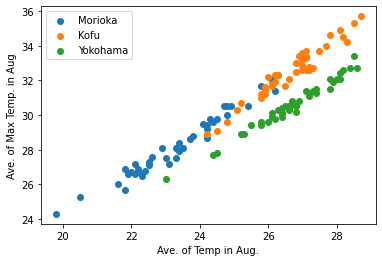

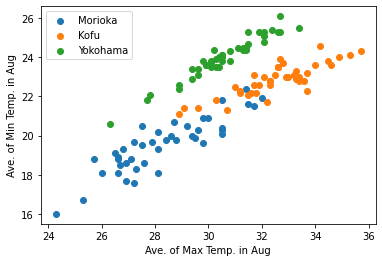

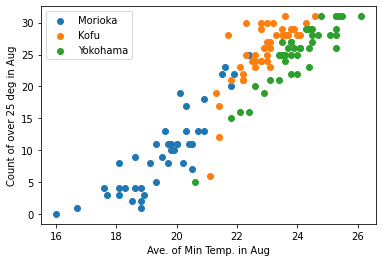

In [4]:
# 生データを散布図でプロットしてみる
# 説明変数が4つで2次元に表示するためには，6通りのxとyの組み合わせがあるが，とりあえず3つだけ
import matplotlib.pyplot as plt

# 都市名ラベルの0番目を除いた説明変数4つ分で3つのグラフを描く
for i in range(1, 4, 1):
  for j, a_city in enumerate(choosed_cities):
    # 3都市分
    x = df_X1.iloc[j*42:(j+1)*42, i].astype(np.float32)
    y = df_X1.iloc[j*42:(j+1)*42, i+1].astype(np.float32)
    plt.scatter(x, y, label=a_city)
  if i==1:
    plt.xlabel('Ave. of Temp in Aug.')
    plt.ylabel('Ave. of Max Temp. in Aug')
  elif i==2:
    plt.xlabel('Ave. of Max Temp. in Aug')
    plt.ylabel('Ave. of Min Temp. in Aug')
  else:
    plt.xlabel('Ave. of Min Temp. in Aug')
    plt.ylabel('Count of over 25 deg in Aug')
  plt.legend()
  plt.show()

横浜が多少分離してみるが，盛岡と甲府が混在しているように見える．

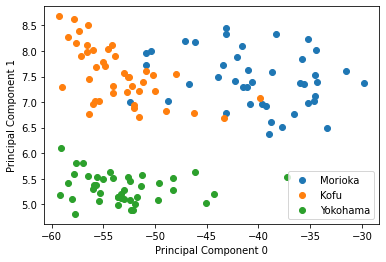

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 標準化する
scaler = StandardScaler()
df_X2 = scaler.fit_transform(df_X1.iloc[:, 1:])

# 合成変数を2次元で作る
pca_model = PCA(n_components=2)
pca_model.fit(df_X2)
# 変換行列ができたので，多次元の説明変数を2次元の合成変数に変換する
transformed_variables = pca_model.transform(df_X1.iloc[:, 1:])
# 使いやすいようにデータフレーム化しておく
transformed_df = pd.DataFrame(transformed_variables)
# 合成変数2つの散布図を描く
for i, a_city in enumerate(choosed_cities):
  plt.scatter(transformed_df.iloc[i*42:(i+1)*42, 0], transformed_df.iloc[i*42:(i+1)*42, 1], label=a_city)
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.show()

元の説明変数の状態のままプロットしても，全て相関係数が高いため，うまく分離できなかった．主成分分析を行い2説明変数へ合成したところ，分離して見えるようになった．

In [0]:
# 寄与率の表示
print(pca_model.explained_variance_ratio_)
# 相関係数の表示
print(transformed_df.corr())

[0.97995861 0.01258219]
              0             1
0  1.000000e+00 -1.182588e-15
1 -1.182588e-15  1.000000e+00


In [0]:
# 元々の変数，合成変数を，それぞれロジスティック回帰して，盛岡か甲府かを判別する
# https://qiita.com/yshi12/items/3dbd336bd9ff7a426ce9

# 元の観測データから盛岡と甲府の部分を取り出し，0列目の都市名ラベルを0と1に入れ替える
# その要素の有無で0と1の2値で表現される変数を「ダミー変数」と呼ぶ
# 0, 1, 2, 3...などの状態が複数あり，かつその数字が大小の意味を持ってない場合は，カテゴリ変数と呼ぶ
# カテゴリ変数は判別問題などで扱えないので，
# カテゴリ変数で表現している内容を，要素に分けて，要素の有無で表現，つまり複数のダミー変数に直す

# 今回は盛岡であるかないかを判別するので，ダミー変数1つ
# Morioka: 0, Kofu: 1
# で表現可能
# 横浜の42年分を取り除いて盛岡と甲府だけにする
df_morioka_kofu = df_X1.iloc[:(42*2), :]
# 都市名列の都市名ラベルをダミー変数化する
df_morioka_kofu_in_dummy = df_morioka_kofu.replace({'Morioka':0, 'Kofu':1})
df_morioka_kofu_in_dummy = df_morioka_kofu_in_dummy.rename(columns={'都市名':'都市名ラベルダミー変数'})
df_morioka_kofu_in_dummy.head()

,都市名ラベルダミー変数,8月の平均気温,8月の日最高気温の月平均,8月の日最低気温の月平均,25度を超えた日数
0,0,21.6,26.0,18.1,4
1,0,24.3,29.8,19.6,13
2,0,22.9,28.1,18.1,8
3,0,19.8,24.3,16.0,0
4,0,21.9,26.6,18.1,3


In [0]:
# 主成分分析した状態のも作っておく
# fitするときに，都市名ラベル列を取り除くのを忘れないように
# 主成分分析の対象となるのは，説明変数だけなので
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(df_morioka_kofu.iloc[:, 1:])
# 主成分分析のデータフレーム
df_transformed_morioka_kofu = pd.DataFrame(pca_model.transform(df_morioka_kofu.iloc[:, 1:]), columns=['主成分0', '主成分1'])
# ダミー変数化した都市名列を再び入れる
city_label_in_dummy = np.repeat(np.array([0, 1]), 42)
df_transformed_morioka_kofu.insert(0, '都市名ラベルダミー変数', city_label_in_dummy)
df_transformed_morioka_kofu.head()

,都市名ラベルダミー変数,主成分0,主成分1
0,0,14.906151,-0.957154
1,0,4.775870,0.091436
2,0,10.402831,-0.548667
3,0,19.791824,-2.475467
4,0,15.625310,-0.087743


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# まず，元々の観測データをロジスティック回帰する
# 本当は相関が高い説明変数間に発生する「多重共線性」の問題があるので，やってはいけない

# ロジスティック回帰はXは説明変数多数の行列，Yは0or1が入った1次元配列を取る
y_whole = df_morioka_kofu_in_dummy.iloc[:, 0].values
x_whole = df_morioka_kofu_in_dummy.iloc[:, 1:].values
# yを1次元配列にする
y_whole = np.ravel(y_whole)
print('Xのshape', x_whole.shape, 'Yのshape', y_whole.shape)

# 訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x_whole, y_whole)

# X, Yの訓練データで学習する
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

# 学習済みのモデルにXテストデータをつっこみ，Yを予測し，観測データと比較
y_predict = log_model.predict(x_test)
accuracy_score = metrics.accuracy_score(y_test, y_predict)
print('4変数のときの正答率:', accuracy_score)

coef_df = pd.DataFrame([df_morioka_kofu.columns[1:], log_model.coef_[0]]).T
# 係数がこの中に入っている．この係数で表される4次元空間の平面で切るとうまく分類できる，という意味
coef_df

Xのshape (84, 4) Yのshape (84,)
4変数のときの正答率: 0.9047619047619048


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,8月の平均気温,-0.716262
1,8月の日最高気温の月平均,-0.41629
2,8月の日最低気温の月平均,1.16353
3,25度を超えた日数,0.335882


Xのshape (84, 2) Yのshape (84,)
X_trainのshape (63, 2) Y_Trainのshape (63,)
主成分分析した後の正答率 0.9047619047619048
切片 [-0.51025158]
      0         1
0  主成分0 -0.381156
1  主成分1   1.38082


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


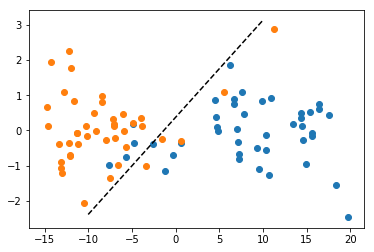

In [0]:
# 次に，主成分分析した結果をロジスティック回帰する

y_whole_tf = df_transformed_morioka_kofu.iloc[:, 0].values
x_whole_tf = df_transformed_morioka_kofu.iloc[:, 1:].values

plt.scatter(df_transformed_morioka_kofu.iloc[:42, 1], df_transformed_morioka_kofu.iloc[:42, 2], label='Morioka')
plt.scatter(df_transformed_morioka_kofu.iloc[42:, 1], df_transformed_morioka_kofu.iloc[42:, 2], label='Kofu')


y_whole_tf = np.ravel(y_whole_tf)
print('Xのshape', x_whole_tf.shape, 'Yのshape', y_whole_tf.shape)

x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_whole_tf, y_whole_tf)
print('X_trainのshape', x_train_tf.shape, 'Y_Trainのshape', y_train_tf.shape)

log_model2 = LogisticRegression()
log_model2.fit(x_train_tf, y_train_tf)
y_predict_tf = log_model2.predict(x_test_tf)
accuracy_score = metrics.accuracy_score(y_test_tf, y_predict_tf)
print('主成分分析した後の正答率', accuracy_score)

coef_df = pd.DataFrame([np.array(['主成分0', '主成分1']), log_model2.coef_[0]]).T
print('切片', log_model2.intercept_)
print(coef_df)

# ロジスティック回帰で求めた直線を引く

w = log_model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (log_model2.intercept_[0]) / w[1]

plt.plot(xx, yy, linestyle='dashed', color='black')
plt.show()